In [1]:
# importing Core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
original_data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

data = original_data.copy(deep= True) # Creating a duplicate copy to keep the Og data untouched
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
print("The number of rows in the Dataset: ", data.shape[0])
print("The number of Columns in the Dataset: ", data.shape[1])

The number of rows in the Dataset:  7043
The number of Columns in the Dataset:  21


In [4]:
# What columns do we have.. 

data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [5]:
# Check datatypes of columns

data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [10]:
# let's check the unique values in the each feature....

unique_values_data = data.nunique().reset_index(name= "Uniquevalues")
unique_values_data

,index,Uniquevalues
0,customerID,7043
1,gender,2
2,SeniorCitizen,2
3,Partner,2
4,Dependents,2
5,tenure,73
6,PhoneService,2
7,MultipleLines,3
8,InternetService,3
9,OnlineSecurity,3


In [18]:
# Let's modify the dtypes for categorical and numerical columns

## all the columns with less than 4 unique values can be called as categories
cat_cols = unique_values_data[unique_values_data['Uniquevalues'] < 5]['index'].to_list()
cat_cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [21]:
for col in cat_cols:
    data[col] = data[col].astype("category")
    
# data['TotalCharges'] = data['TotalCharges'].
data.dtypes

customerID            object
gender              category
SeniorCitizen       category
Partner             category
Dependents          category
tenure                 int64
PhoneService        category
MultipleLines       category
InternetService     category
OnlineSecurity      category
OnlineBackup        category
DeviceProtection    category
TechSupport         category
StreamingTV         category
StreamingMovies     category
Contract            category
PaperlessBilling    category
PaymentMethod       category
MonthlyCharges       float64
TotalCharges          object
Churn               category
dtype: object

In [22]:
# check basic statistic or summary of numerical data

data.describe(include= "category")

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3555,5901,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


We also have a column Total Charges which data type is object let's change it to numeric.

In [41]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors= "coerce")
data.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [44]:
100*data['TotalCharges'].isna().sum()/len(data)

0.15618344455487718

The TotalCharges null values are just 0.15% of total data, we can easily get rid of them as it is very small fraction of data.

In [45]:
data.dropna(how= "any", inplace= True)

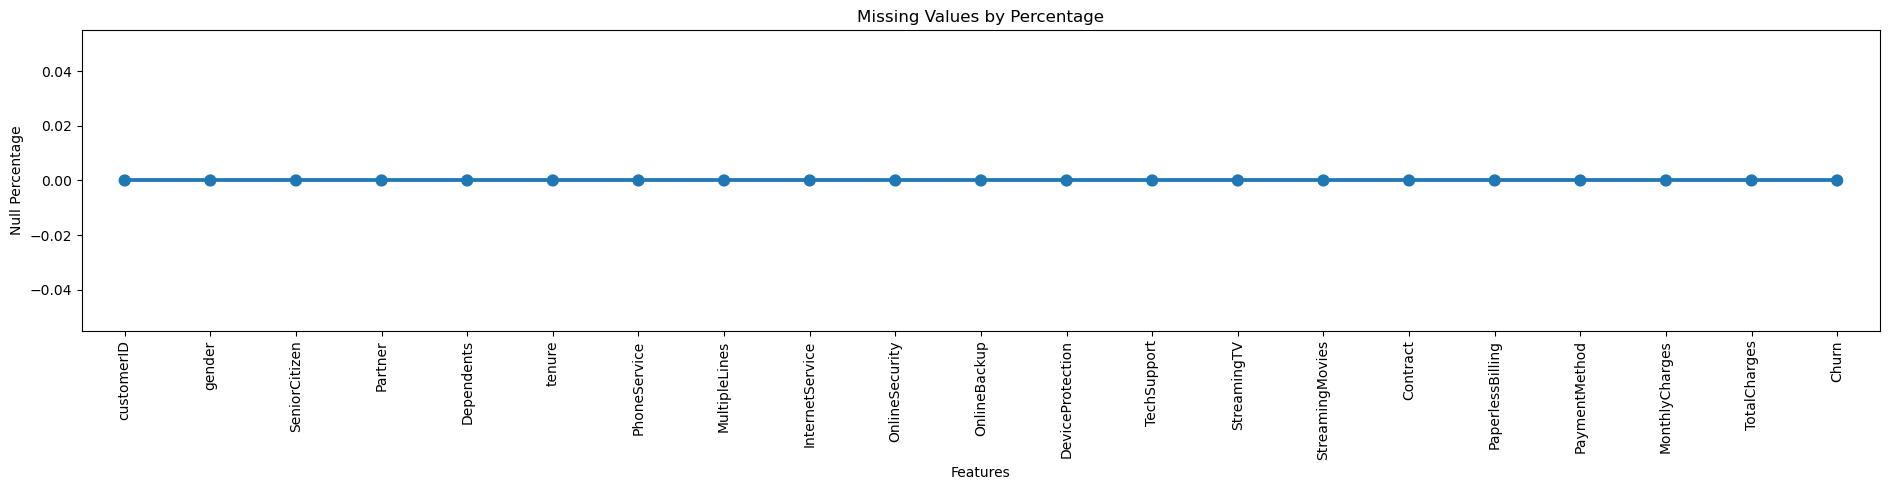

In [46]:
missing_data = pd.DataFrame(100*data.isna().sum()/len(data)).reset_index()

plt.figure(figsize=(19,5))
sns.pointplot(data= missing_data, x= "index",y= 0)
plt.xticks(rotation= 90, fontsize= 10)
plt.title("Missing Values by Percentage")
plt.xlabel("Features")
plt.ylabel("Null Percentage")

plt.tight_layout()
plt.show()

In [47]:
data.describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


75% customers have tenure less than 55 months

Average Monthly charges are USD 64.76 whereas 25% customers pay more than USD 89.85 per month 

Average Total Charges a customer faces is around USD 2283 per month but almost 50% percent pays USD 1397 in total. it means there are Outliers in the TotalCharges column,

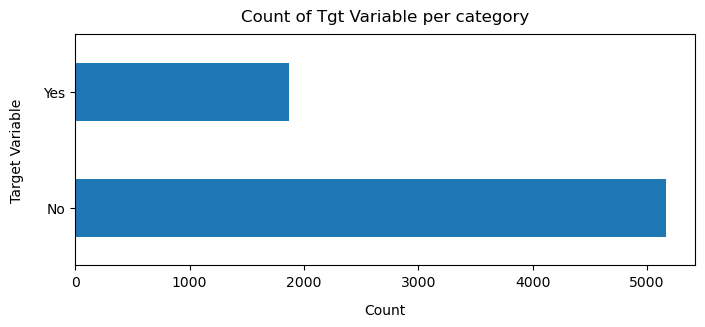

In [52]:
data["Churn"].value_counts().plot(kind= "barh", figsize= (8,3))
plt.xlabel("Count", labelpad= 10)
plt.ylabel("Target Variable", labelpad= 14)
plt.title("Count of Tgt Variable per category", y= 1.02)
plt.show()

There is a lot of Imbalance in the data set. Which can lead to building a bad model.There are multiple ways to treat the Imbalanced data like
1. **Upsampling:** Generate synthetic samples to balance the classes.  
2. **Downsampling:** Reduce the majority class to match the minority class.  

Divide the customer group tenures into year bin rather than month to do analysis better. Eg: for tenure month < 12 we can group into 0 - 1 y, for tenure between 1 - 2 years, tenure group of 13 - 24 so on

In [53]:
# Get the max tenure

data['tenure'].max() #72

72

In [55]:
# group the tenure in bins of 12 months

labels = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

data['tenure_group'] = pd.cut(data['tenure'], range(1, 80, 12), right=False, labels=labels)

In [66]:
data['tenure_group'].value_counts()

tenure_group
1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: count, dtype: int64

Remove columns that are not require for processing like customer's name, unique ID. These features doesn't help that much in the prediction or EDA.

In [67]:
# drop columns customer id and tenure

data.drop(columns= ["customerID", "tenure"], axis= 1, inplace= True)
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn', 'tenure_group'],
      dtype='object')

## Data Exloration or Exploratory Data Analysis

### Univariate Analysis

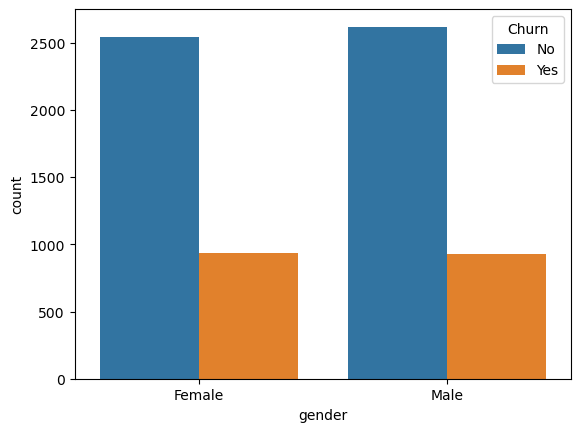

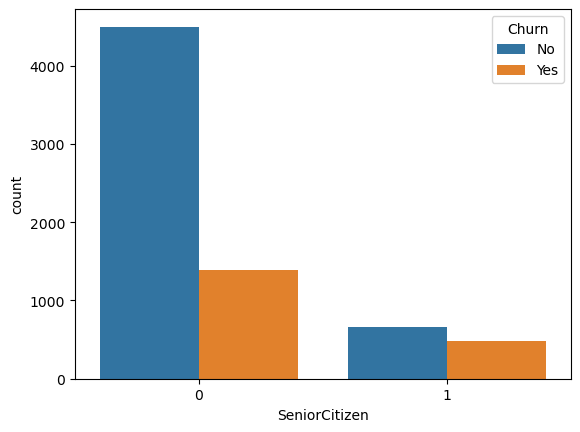

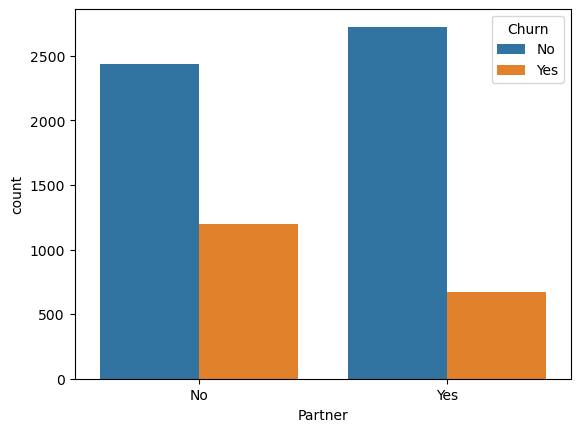

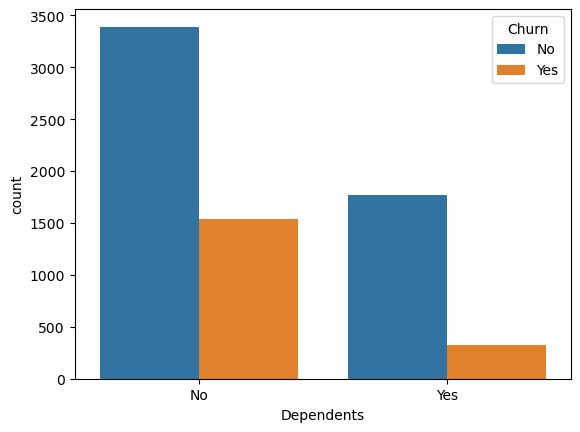

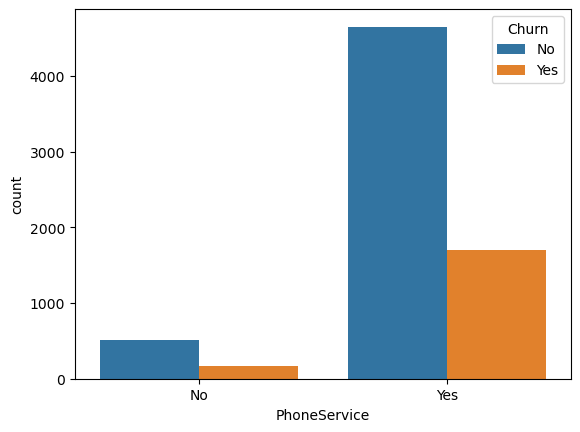

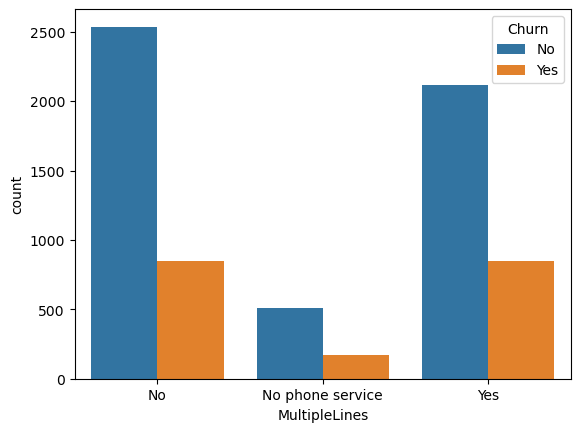

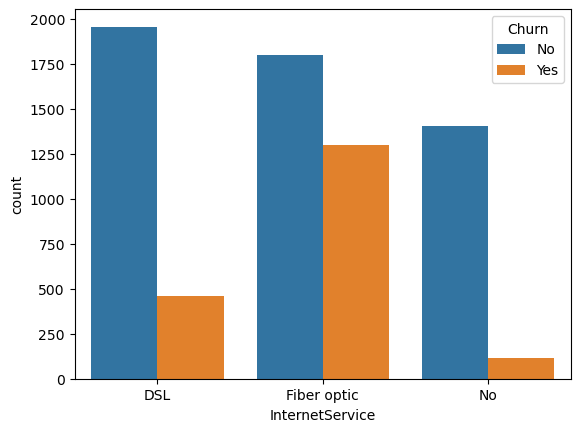

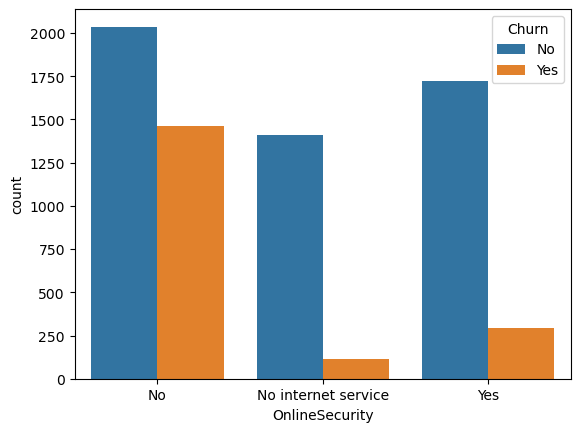

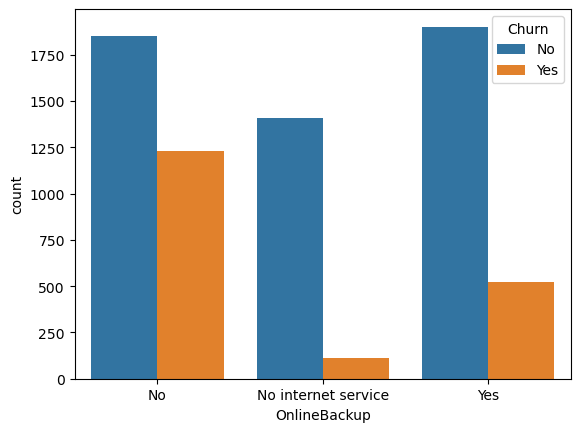

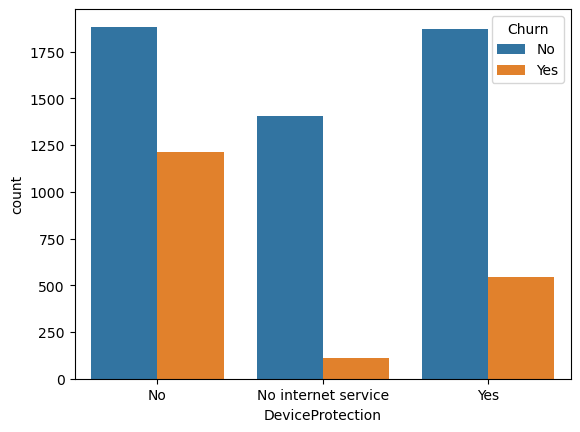

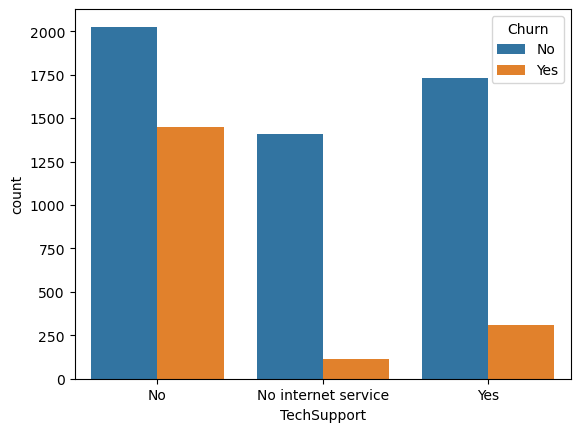

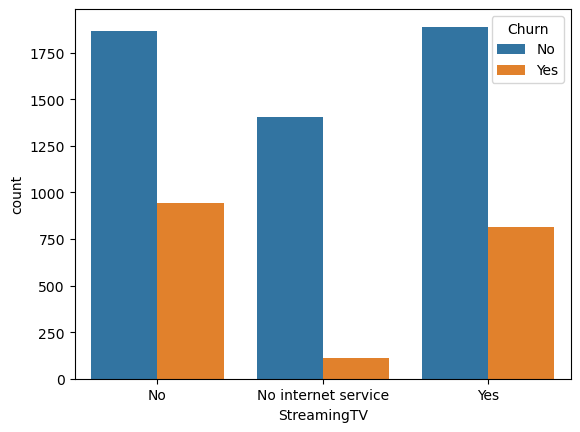

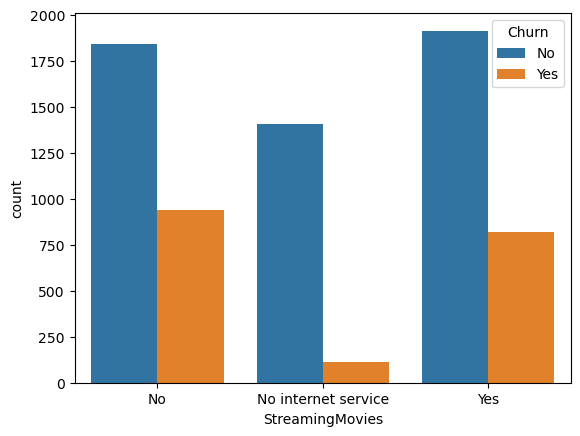

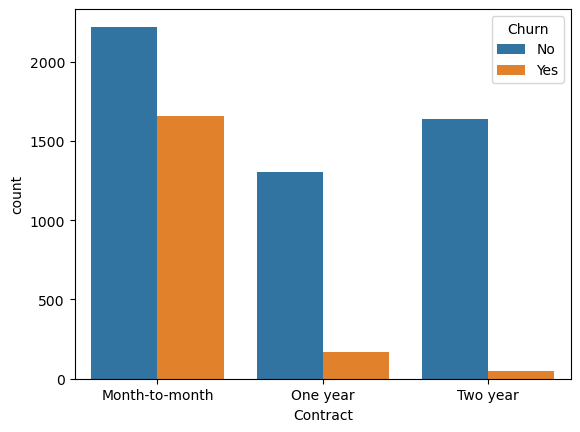

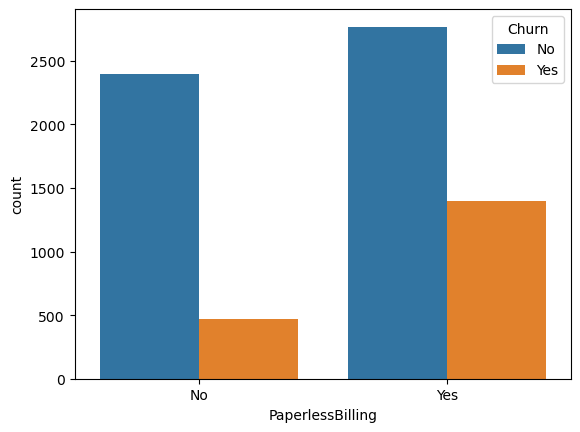

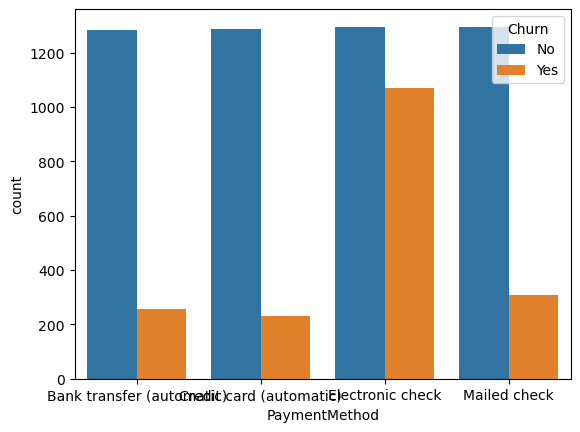

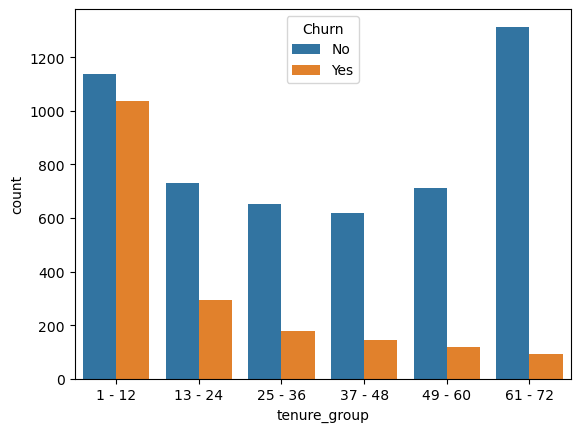

In [72]:
for i, feature in enumerate(data.drop(columns= ['Churn', "TotalCharges", "MonthlyCharges"])):
    plt.figure(i)
    sns.countplot(data= data, x= feature, hue= "Churn")

In [74]:
# Convert target variable "Churn", into binary numeric values that is Yes = 1 and No = 0.

data['Churn'] = np.where(data['Churn'] == "Yes", 1, 0)
data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,0,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,0,1 - 12


In [76]:
data_dummies = pd.get_dummies(data)
data_dummies.head()

,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,29.85,29.85,0,True,False,True,False,False,True,True,...,False,False,True,False,True,False,False,False,False,False
1,56.95,1889.50,0,False,True,True,False,True,False,True,...,False,False,False,True,False,False,True,False,False,False
2,53.85,108.15,0,False,True,True,False,True,False,True,...,False,False,False,True,True,False,False,False,False,False
3,42.30,1840.75,0,False,True,True,False,True,False,True,...,True,False,False,False,False,False,False,True,False,False
4,70.70,151.65,0,True,False,True,False,True,False,True,...,False,False,True,False,True,False,False,False,False,False


C:\Users\302sy\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


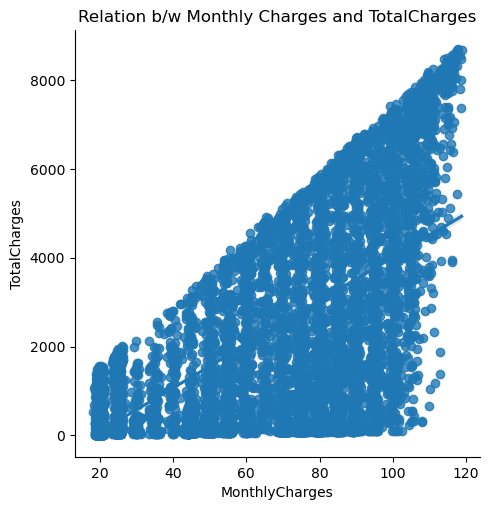

In [80]:
# relation between monthly charges and TotalCharges

sns.lmplot(data= data, x= "MonthlyCharges", y= "TotalCharges")
plt.title("Relation b/w Monthly Charges and TotalCharges")
plt.show()